In [3]:
import os

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [5]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\data\mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [6]:
df.shape

(400, 3)

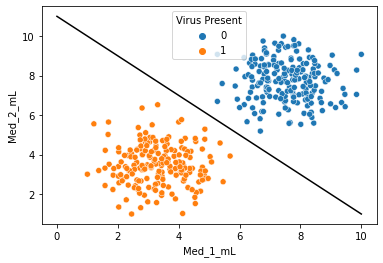

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df,hue="Virus Present")

#manualy creating an hyperplane
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,'black')

In [8]:
from sklearn.svm import SVC

In [9]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [10]:
y = df['Virus Present']

In [11]:
X = df.drop('Virus Present',axis=1)
X.head()

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562


In [12]:
SVM_model = SVC(kernel='poly',  C=1000)

In [13]:
SVM_model.fit(X,y)

SVC(C=1000, kernel='poly')

In [14]:
SVC(C=1000, kernel='poly')
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()


c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


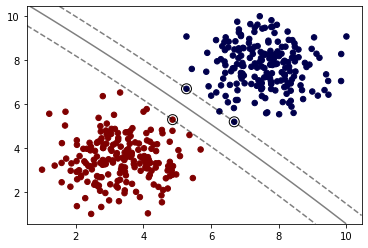

In [16]:
plot_svm_boundary(SVM_model,X,y)

In [21]:
#exploring hlyper parameters in SVM

Svm_Model = SVC(kernel='linear', C=0.05)
Svm_Model.fit(X,y)

SVC(C=0.05, kernel='linear')

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


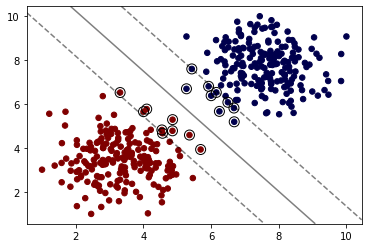

In [22]:
plot_svm_boundary(Svm_Model,X,y)

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


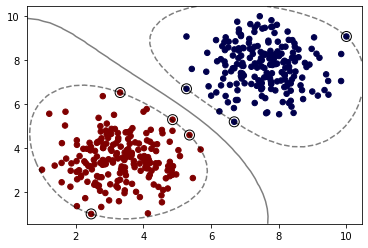

In [23]:
model = SVC(kernel='rbf', C=5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


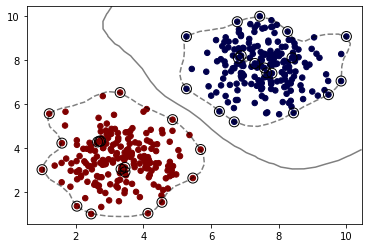

In [24]:
model1 = SVC(kernel='rbf', C=5, gamma='auto')
model1.fit(X,y)
plot_svm_boundary(model1,X,y)

#applying gamma makes support vector overfitted(tighly fit) it fits the margin more

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


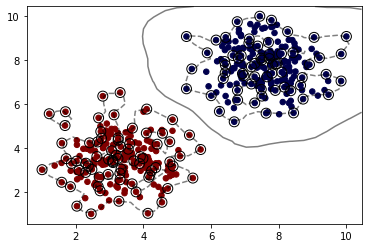

In [25]:
model2 = SVC(kernel='rbf', C=5, gamma= 2)
model2.fit(X,y)
plot_svm_boundary(model2,X,y)

#AS gamma value is increasing  it fits the support vector near the margin more

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


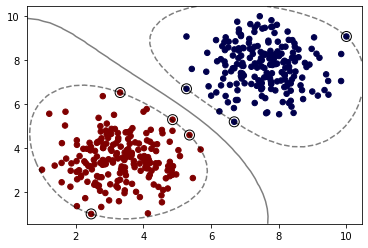

In [26]:
model3 = SVC(kernel='rbf', C=5, gamma= 'scale')
model3.fit(X,y)
plot_svm_boundary(model3,X,y)

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


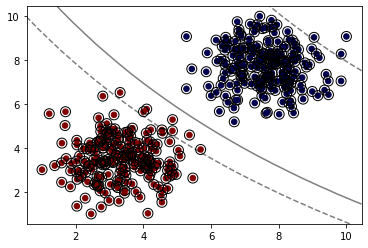

In [28]:
model4 = SVC(kernel='sigmoid', C=1, gamma= 'scale')
model4.fit(X,y)
plot_svm_boundary(model4,X,y)

# here it is taking all points as support vector, sigmoid function is not good for this classification
# no classification is happening here

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


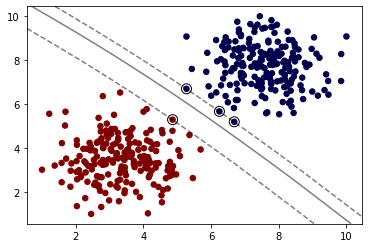

In [35]:
model5 = SVC(kernel='poly', C=1, degree=9)
model5.fit(X,y)
plot_svm_boundary(model5,X,y)

#degree changes the curvature of the hyperplane

YOU CAN ALSO USE CROSS VALIDATION, IF YOU DONT DO IT MANUALLY

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
svm_model = SVC()

param_grid = {'C':[0.01,0.1,1,2], 'kernel':['linear','rbf','poly','sigmoid']}

In [32]:
grid_model = GridSearchCV(svm_model,param_grid)
grid_model.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [34]:
grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}